# Данный файл содержит алгоритм предобработки Global DataFrame - датафрейма, необходимого для построения модели

Проанализируйте столбцы. Что в них содержится? Опишите переменные. Есть ли в данных пропуски? Обработайте пропуски. Если в какой-то колонке пропусков большинство, то ее можно удалить. Если их не очень много, можно заполнить их медианой/средним или чем-нибудь еще, напишите почему вы выбрали тот или иной вариант.

## Первичная очистка и объединение

In [ ]:
import pandas as pd
import re
import numpy as np

In [ ]:
df_items = pd.read_csv('https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Global/Sales.tsv', delimiter = "\t")
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link
0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,$337.59,$0.00,"19,787","$6,679,958.00",https://www.ebay.com/itm/254604777645?nordt=tr...
1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,$266.28,$0.00,"12,440","$3,312,560.60",https://www.ebay.com/itm/254187678666?nordt=tr...
2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,$359.11,$16.93,"12,224","$4,389,742.37",https://www.ebay.com/itm/363183815277?nordt=tr...
3,Apple iPhone X 64GB Factory Unlocked Phone - V...,$231.98,$16.50,"11,781","$2,732,899.88",https://www.ebay.com/itm/382605209867?nordt=tr...
4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,$263.59,$15.34,"10,020","$2,641,203.85",https://www.ebay.com/itm/382446518910?nordt=tr...


In [ ]:
df_items.dropna(subset=['Link'], inplace=True)
df_items.reset_index(inplace=True)
df_items.drop('index', axis=1, inplace = True)
df_items.isna().sum()

Title            0
Price            0
Shipping_cost    0
Sales_Count      0
Sales_Value      0
Link             0
dtype: int64

In [ ]:
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link
0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,$337.59,$0.00,"19,787","$6,679,958.00",https://www.ebay.com/itm/254604777645?nordt=tr...
1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,$266.28,$0.00,"12,440","$3,312,560.60",https://www.ebay.com/itm/254187678666?nordt=tr...
2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,$359.11,$16.93,"12,224","$4,389,742.37",https://www.ebay.com/itm/363183815277?nordt=tr...
3,Apple iPhone X 64GB Factory Unlocked Phone - V...,$231.98,$16.50,"11,781","$2,732,899.88",https://www.ebay.com/itm/382605209867?nordt=tr...
4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,$263.59,$15.34,"10,020","$2,641,203.85",https://www.ebay.com/itm/382446518910?nordt=tr...


In [ ]:
def Sales_Value(value):
  pattern = r'\$|,'
  clean_value = re.sub(pattern, '', value)
  numeric_value = float(clean_value)
  return numeric_value


df_items.Price = df_items.Price.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Shipping_cost = df_items.Shipping_cost.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Sales_Count = df_items.Sales_Count.apply(lambda x: float(re.sub(",", "", x)))
df_items.Sales_Value = df_items.Sales_Value.apply(lambda x: Sales_Value(x))

In [ ]:
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link
0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,337.59,0.00,19787.0,6679958.00,https://www.ebay.com/itm/254604777645?nordt=tr...
1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,266.28,0.00,12440.0,3312560.60,https://www.ebay.com/itm/254187678666?nordt=tr...
2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,359.11,16.93,12224.0,4389742.37,https://www.ebay.com/itm/363183815277?nordt=tr...
3,Apple iPhone X 64GB Factory Unlocked Phone - V...,231.98,16.50,11781.0,2732899.88,https://www.ebay.com/itm/382605209867?nordt=tr...
4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,263.59,15.34,10020.0,2641203.85,https://www.ebay.com/itm/382446518910?nordt=tr...


In [ ]:
brands_list = ['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'Oppo', 'OnePlus', 'Google', 'Motorola', 'Sony', 'LG', 'HTC', 'Nokia', 'BlackBerry', 'Lenovo', 'Asus', 'ZTE', 'Alcatel', 'Vivo', 'Realme', 'Honor']
brands_regex = re.compile('('+ '|'.join(brands_list) + ')', flags=re.IGNORECASE)

df_items['brand'] = df_items['Title'].str.extract(brands_regex)
df_items['brand'] = df_items['brand'].apply(lambda x: x.lower() if type(x) == str else x)
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,brand
0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,337.59,0.00,19787.0,6679958.00,https://www.ebay.com/itm/254604777645?nordt=tr...,apple
1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,266.28,0.00,12440.0,3312560.60,https://www.ebay.com/itm/254187678666?nordt=tr...,apple
2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,359.11,16.93,12224.0,4389742.37,https://www.ebay.com/itm/363183815277?nordt=tr...,apple
3,Apple iPhone X 64GB Factory Unlocked Phone - V...,231.98,16.50,11781.0,2732899.88,https://www.ebay.com/itm/382605209867?nordt=tr...,apple
4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,263.59,15.34,10020.0,2641203.85,https://www.ebay.com/itm/382446518910?nordt=tr...,apple


Здесь мы задаём, какие у нас есть бренды и далее компелируем данные для последующего использования.

Далее создаём новый столбик с данными, к какому бренду принадлежит смартфон, чтобы можно было работать с этой информацией.

In [ ]:
characteristics_df = pd.read_csv("https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Global/Characteristics.tsv", delimiter = "\t")

C:\Users\druny\AppData\Local\Temp\ipykernel_25300\2426919534.py:1: DtypeWarning: Columns (27,28,32,35,36,39,45,46,55,56,59,65,68,69,70,74,77,78,89,95,99,101,106,107,113,116,122,134,138,139,140,146,152,153,154,156,159,162,163,166,167,168,171,173,175,176,180,181,182,187,188,189,190,192,193,194,198,199,201,202,206,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,226,229,233,235,236,238,240,241,244,245,246,247,248,251,252,254,257,259,261,265,266,267,272,273,274,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,307,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,345,346,347,348,349,350,351,352) have mixed types. Specify dtype option on import or set low_memory=False.
  characteristics_df = pd.read_csv("https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Global/Characteristics.tsv", delimiter = "\t")


In [ ]:
cols = list(characteristics_df.count()[(characteristics_df.count()>(1000))].index)
cols

['Link',
 'Condition',
 'Seller Notes',
 'Brand',
 'Model',
 'Storage Capacity',
 'Network',
 'Camera Resolution',
 'Screen Size',
 'Lock Status',
 'RAM',
 'Contract',
 'Operating System',
 'Model Number',
 'Style',
 'MPN',
 'Connectivity',
 'Features',
 'SIM Card Slot',
 'Memory Card Type',
 'Processor',
 'Color']

In [ ]:
characteristics_df = characteristics_df[cols]

In [ ]:
characteristics_df.isna().sum().sort_values()

Link                    0
Condition               0
Brand                  20
Model                 166
Operating System      380
Storage Capacity      425
Network               508
Camera Resolution     511
Screen Size           511
MPN                   685
Processor             697
Connectivity          721
Lock Status           724
RAM                   726
Contract              758
Features              827
Seller Notes          853
Style                 956
SIM Card Slot         991
Model Number         1058
Memory Card Type     1397
Color                1787
dtype: int64

In [ ]:
merged_df = df_items.merge(characteristics_df, on='Link', how='inner')

In [ ]:
merged_df["Brand"][merged_df["Brand"].isna()] = merged_df["brand"].apply(lambda x: x.title() if type(x)==str else x)

C:\Users\druny\AppData\Local\Temp\ipykernel_25300\2412579994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Brand"][merged_df["Brand"].isna()] = merged_df["brand"].apply(lambda x: x.title() if type(x)==str else x)


In [ ]:
(~merged_df.isna()).sum()

Title                3081
Price                3081
Shipping_cost        3081
Sales_Count          3081
Sales_Value          3081
Link                 3081
brand                2695
Condition            3081
Seller Notes         2200
Brand                3073
Model                2911
Storage Capacity     2630
Network              2541
Camera Resolution    2560
Screen Size          2556
Lock Status          2325
RAM                  2335
Contract             2289
Operating System     2689
Model Number         1961
Style                2067
MPN                  2356
Connectivity         2330
Features             2216
SIM Card Slot        2044
Memory Card Type     1612
Processor            2358
Color                1204
dtype: int64

Тут мы смотрим какие данные из датафрейма присутсвуют и отсутствуют и в каком количестве.

In [ ]:
merged_df.iloc[182]

Title                Motorola Moto G Stylus 5G XT2131-3 GSM Unlocke...
Price                                                           199.56
Shipping_cost                                                    10.39
Sales_Count                                                      673.0
Sales_Value                                                  134304.65
Link                 https://www.ebay.com/itm/203747687712?nordt=tr...
brand                                                         motorola
Condition                                                     Open box
Seller Notes         “Unlocked and compatible with any GSM Carrier ...
Brand                                                         Motorola
Model                                                      G stylus 5G
Storage Capacity                                                128 GB
Network                                                  AT&T Unlocked
Camera Resolution                                              48.0 MP
Screen

In [ ]:
merged_df.drop('brand', axis=1, inplace = True)

In [ ]:
merged_df.to_csv("Global Merged.tsv", sep="\t")

In [ ]:
merged_df.shape

(3081, 27)

In [ ]:
У нас получилась табличка с 27 колонками и данными о смартфонах в количестве 3081.

## Вторичная предобработка полученных с eBay данных

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Preprocessing/Global/Global Merged.tsv', delimiter = '\t')

In [ ]:
df.head()

,Unnamed: 0,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,...,Operating System,Model Number,Style,MPN,Connectivity,Features,SIM Card Slot,Memory Card Type,Processor,Color
0,0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,337.59,0.00,19787.0,6679958.00,https://www.ebay.com/itm/254604777645?nordt=tr...,Very Good - Refurbished,“This iPhone 11 is in Very Good condition and ...,Apple,...,iOS,A2111,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,266.28,0.00,12440.0,3312560.60,https://www.ebay.com/itm/254187678666?nordt=tr...,Very Good - Refurbished,“This Apple iPhone XR 64GB Factory Unlocked Sm...,Apple,...,iOS,A1984,Smartphone,MRYR2LL/A,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,359.11,16.93,12224.0,4389742.37,https://www.ebay.com/itm/363183815277?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",Apple,...,iOS,A2111 (CDMA + GSM),NaN,"MWLD2LL/A, MWL72LL/A, MWL82LL/A, MWL92LL/A, MW...","4G, Bluetooth, GPS","Face ID, Three-axis gyro, 4K Video Recording, ...",Single SIM,Not Applicable,Hexa Core,NaN
3,3,Apple iPhone X 64GB Factory Unlocked Phone - V...,231.98,16.50,11781.0,2732899.88,https://www.ebay.com/itm/382605209867?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",Apple,...,iOS,A1901,Smartphone,MQA62LL/A,"2G, 3G, 4G, Bluetooth, GPS, LTE, Wi-Fi","4K Video Recording, Bluetooth Enabled, Email, ...",Single SIM,NaN,Hexa Core,NaN
4,4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,263.59,15.34,10020.0,2641203.85,https://www.ebay.com/itm/382446518910?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",Apple,...,iOS,A1901,Smartphone,"MQAN2LL/A, MQAM2LL/A","4G, Bluetooth, GPS","4K Video Recording, Bluetooth Enabled",Single SIM,NaN,Hexa Core,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'Title', 'Price', 'Shipping_cost', 'Sales_Count',
       'Sales_Value', 'Link', 'Condition', 'Seller Notes', 'Brand', 'Model',
       'Storage Capacity', 'Network', 'Camera Resolution', 'Screen Size',
       'Lock Status', 'RAM', 'Contract', 'Operating System', 'Model Number',
       'Style', 'MPN', 'Connectivity', 'Features', 'SIM Card Slot',
       'Memory Card Type', 'Processor', 'Color'],
      dtype='object')

In [ ]:
df.drop(columns = 'Unnamed: 0', inplace = True)

<Axes: >

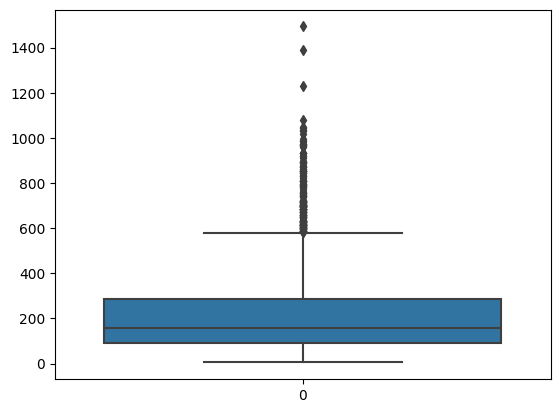

In [ ]:
import seaborn as sns
sns.boxplot(df.Price)

## Ищем и убираем мусор.

Ищем наблюдения, у которых значения больше и меньше 0.01 и 0.099 квантиля соответсвенно, так как данные содержат некоторые выбросы.

In [ ]:
import numpy as np
df[df.Price > np.quantile(df.Price, 0.99)]

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,Model,...,Operating System,Model Number,Style,MPN,Connectivity,Features,SIM Card Slot,Memory Card Type,Processor,Color
384,Apple iPhone 14 Pro Max 128GB Space Black - (U...,1045.48,0.00,355.0,371146.00,https://www.ebay.com/itm/134281877123?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 14 Pro Max,...,iOS,NaN,Bar,MQ8N3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Black
672,Apple iPhone 14 Pro 128GB Space Black - (Unloc...,933.62,0.00,234.0,218467.14,https://www.ebay.com/itm/364016785976?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 14 Pro,...,iOS,NaN,Bar,MPXT3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Black
719,Apple iPhone 12 Pro Max 5G 128GB Graphite - (V...,918.07,0.00,234.0,214829.32,https://www.ebay.com/itm/363276125904?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 12 Pro Max,...,iOS,NaN,Bar,MG9A3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Gray
762,Apple iPhone 12 Pro Max 5G 256GB Graphite - (V...,970.09,0.00,236.0,228940.53,https://www.ebay.com/itm/363276131710?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 12 Pro Max,...,iOS,NaN,Bar,NaN,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Gray
918,"SAMSUNG Galaxy S23, S23+, S23Ultra 5G Unlocked...",1229.73,11.58,159.0,195526.91,https://www.ebay.com/itm/354557412430?nordt=tr...,"New: A brand-new, unused, unopened, undamaged ...",NaN,Samsung,Samsung Galaxy S23 / S23+ / S23 Ultra 5G,...,Android,NaN,Smartphone,"SM-S918N, SM-S916N, SM-S911N",5G,IP68,NaN,NaN,NaN,NaN
930,Apple iPhone 13 Pro Max 5G 128GB Sierra Blue -...,996.42,0.00,230.0,229175.70,https://www.ebay.com/itm/363687011705?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 13 Pro Max,...,iOS,NaN,Bar,MLKP3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Blue
1034,Apple iPhone 13 Pro Max 5G 256GB Graphite MLKR...,1036.79,0.00,225.0,233277.96,https://www.ebay.com/itm/363667334620?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 13 Pro Max,...,iOS,NaN,Bar,MLKR3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Gray
1113,Samsung Galaxy Z Fold 4 F936U1 512GB (Factory ...,958.24,27.06,126.0,120738.74,https://www.ebay.com/itm/325405959604?nordt=tr...,Open box,“The device will be in excellent condition. Sc...,Samsung,Samsung Galaxy Z Fold4,...,Android,SM-F936U1,Foldable,"SM-F936UZKEXAA, SM-F936UZKFXAA",5G,Dual Screen,Single SIM,NaN,Octa Core,NaN
1185,Apple iPhone 13 Pro Max 256GB Gold - (Verizon)...,1015.97,0.00,145.0,147315.00,https://www.ebay.com/itm/144475670475?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 13 Pro Max,...,iOS,NaN,Bar,MLKU3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Gold
1255,Apple iPhone 13 Pro Max 5G 256GB Sierra Blue -...,984.53,0.00,122.0,120113.00,https://www.ebay.com/itm/363660360454?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 13 Pro Max,...,iOS,NaN,Bar,MLKV3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Blue


In [ ]:
df[df.Price < np.quantile(df.Price, 0.01)]

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,Model,...,Operating System,Model Number,Style,MPN,Connectivity,Features,SIM Card Slot,Memory Card Type,Processor,Color
164,Wall Outlet To Triple USB Power Adapter - Wall...,9.99,12.91,940.0,9388.60,https://www.ebay.com/itm/363346871915?nordt=tr...,"New: A brand-new, unused, unopened, undamaged ...",NaN,Unbranded,AC Wall To 5V DC USB Charger + USB-C Cables,...,NaN,NaN,Wall Outlet To Triple USB Socket Adapter + Cables,dual-slot-pc-plug-in-mobile-cell-phone-replace...,USB,NaN,NaN,NaN,NaN,NaN
339,Apple iPhone 3Gs (AT&T) Smartphone 8GB Black -...,22.71,18.51,357.0,8107.07,https://www.ebay.com/itm/133883518502?nordt=tr...,Used,"“Phone Only, No Charger”",Apple,Apple iPhone 3GS,...,iOS,A1303 (GSM),Bar,A1303,3G,Color Screen,Single SIM,Built-In Storage,NaN,Black
433,DOOGEE S89 Pro Rugged Smartphone 8+256GB 12000...,7.73,0.00,550.0,4252.25,https://www.ebay.com/itm/353640445665?nordt=tr...,"New: A brand-new, unused, unopened, undamaged ...",NaN,DOOGEE,S89 Pro,...,Android,NaN,Outdoor Waterproof Smartphone,DOOGEE S89 Pro Smartphone,"2G, 3G, 4G, Bluetooth, GPRS, GPS, NFC, USB Typ...","Tricolour breathing light, Helio P90/Octa Core...",Dual SIM (SIM + SIM + Memory Card),MiniSD,Octa Core,Orange
855,DOOGEE S61 Rugged Smartphone Andriod 12 Unlock...,11.24,0.00,298.0,3349.59,https://www.ebay.com/itm/363607803077?nordt=tr...,Used,“99% New. This phone has been used for a short...,DOOGEE,S61,...,Android 12,DOOGEE S61 Outdoor Cell Phones,Night Vision Rugged Smartphone,DOOGEE S61 Rugged Smartphone,"FM, 2G, 3G, 4G, Bluetooth, GPRS, GPS, NFC, Wi-Fi","Helio G35 / Octa Core / 2.3GHz / 12nm, 6.0"" IP...",Dual SIM (SIM + SIM/Memory Card),MicroSD,Octa Core,Black
1266,AT&T Radiant Core U304AA - 16GB - Black (AT&T ...,22.73,18.99,137.0,3114.03,https://www.ebay.com/itm/133623095822?nordt=tr...,Used,“Handset Only: Battery and back cover is NOT i...,NaN,Radiant Core,...,Android,U304AA,NaN,NaN,Micro USB,"Camera, Bluetooth Enabled, Wi-Fi Capable, GPS,...",Single SIM,MicroSD,Quad Core,Black
1424,Apple iPhone 4s (Verizon) Smartphone (16GB) Bl...,23.49,9.93,95.0,2231.42,https://www.ebay.com/itm/134141893954?nordt=tr...,Used,"“Phone only, Charger not included!”",Apple,Apple iPhone 4s,...,iOS,A1387 (CDMA + GSM),Bar,A1387,3G,Color Screen,Single SIM,Built-In Memory,NaN,Black
1460,LG Rebel 4 LML212VL - 16GB - Black (TracFone) ...,23.03,6.16,115.0,2648.69,https://www.ebay.com/itm/255628398548?nordt=tr...,Used,"“Tested for full functions,R2/Ready ready for ...",LG,LG Rebel 4,...,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black
1622,DOOGEE S98 Pro 8+256GB Thermal Imaging/Night v...,10.84,0.00,139.0,1507.06,https://www.ebay.com/itm/353640377703?nordt=tr...,"New: A brand-new, unused, unopened, undamaged ...",NaN,DOOGEE,S98 Pro,...,Android,DOOGEE S98 Pro Smartphone,Waterproof Smartphone,DOOGEE Outdoor Smartphone,"2G, 3G, 4G, Bluetooth, Wi-Fi, GPRS, GPS, NFC, ...","Thermal imaging camera, Helio G96/Octa Core/2....",Dual SIM (SIM + SIM + Memory Card),MicroSD,Octa Core,Black
1626,Motorola Droid RAZR MAXX (Verizon) 4G LTE Smar...,14.29,7.50,125.0,1786.50,https://www.ebay.com/itm/133885462237?nordt=tr...,Used,"“Phone Only, No Charger”",Motorola,Motorola Droid Razr,...,Android,XT912,Bar,NaN,4G+,Wi-Fi Capable,Single SIM,"MicroSD, MicroSDHC",Dual Core,Purple
1643,Apple iPhone 4s (AT&T) Smartphone (16GB) Black...,24.37,12.53,75.0,1827.62,https://www.ebay.com/itm/133884939196?nordt=tr...,Used: An item that has been used previously. T...,NaN,Apple,Apple iPhone 4s,...,iOS,A1387 (CDMA + GSM),Bar,A1387,3G,Color Screen,Single SIM,Built-In Memory,NaN,Black


In [ ]:
df = df.drop(df[df['Title'].str.lower().str.contains("charger")].index)

In [ ]:
df[df['Title'].str.lower().str.contains("charger")]

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,Model,...,Operating System,Model Number,Style,MPN,Connectivity,Features,SIM Card Slot,Memory Card Type,Processor,Color


## Рассматриваем характеристики

### Состояние устройства

In [ ]:
df.Condition.value_counts()

Used                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        886
New: A brand-new, unused, unopened, undamaged item in its original packaging (where packaging is ...Read moreabout the conditionNew: A brand-new, unused, unopened, undamaged item in its original packaging (where packaging is applicable). Packaging should be the same as what is found in a retail store, unless the item is handmade or was packaged by the manufacturer in non-retail packaging, such as an unprinted box or plastic bag. See the seller's listin

In [ ]:
df['Condition'] = df['Condition'].str.split(':', n=1).str[0]

In [ ]:
df.Condition.value_counts()

Used                        1000
New                          688
Open box                     499
Good - Refurbished           381
Very Good - Refurbished      297
Excellent - Refurbished      172
For parts or not working      26
Certified - Refurbished       17
Name: Condition, dtype: int64

### Бренд

В списке названий брендов сейчас содержаться дубликаты, мы это устраняем

In [ ]:
df.Brand.value_counts().index

Index(['Samsung', 'Apple', 'LG', 'Google', 'Motorola', 'Samsung Electronics',
       'UMIDIGI', 'Unbranded', 'CAT', 'Kyocera', 'BlackBerry', 'Sonim', 'TCL',
       'BLU', 'DOOGEE', 'Nokia', 'Xiaomi', 'OnePlus', 'XGODY', 'T-Mobile',
       'Alcatel', 'AGM', 'Unihertz', 'ZTE', 'Tracfone', 'Microsoft', 'Palm',
       'OUKITEL', 'Blackview', 'Lively', 'HTC', 'Huawei', 'Verizon Wireless',
       'Lg', 'GOOGLE', 'Ulefone', 'Sony', 'MOTOROLA', 'TracFone',
       'Total By Verizon', 'Verizon', 'Visible', 'APPLE', 'oneplus',
       'Simple Mobile', 'Cricket', 'AT&T', 'Gotake', 'SOYES', 'Maxwest',
       'ASUS', 'Melrose', 'Sky Devices', 'Orbic', 'invisibleSHIELD',
       'Boost Mobile', 'UMX', 'Lanchaung', 'Cellution', 'Cubot', 'mophie',
       'M12', 'Consumer Priority Services', 'SAMSUNG', 'Honor', 'Schok',
       'UMIDGI', 'Satrend', 'Amazon', 'ULEFONE', 'NUU', 'no brand',
       'Wingtech Technology', 'UScellular', 'WingTech', 'Essential', 'OPPO'],
      dtype='object')

In [ ]:
df['Brand'] = df['Brand'].str.lower()

In [ ]:
df.loc[df['Brand'] == 'samsung electronics', 'Brand'] = 'samsung'

In [ ]:
df.loc[df['Brand'] == 'verizon wireless', 'Brand'] = 'verizon'

In [ ]:
df.Brand.value_counts().index

Index(['samsung', 'apple', 'lg', 'google', 'motorola', 'umidigi', 'unbranded',
       'cat', 'kyocera', 'blackberry', 'sonim', 'blu', 'tcl', 'doogee',
       'oneplus', 'nokia', 'xgody', 'xiaomi', 't-mobile', 'alcatel',
       'tracfone', 'agm', 'verizon', 'unihertz', 'zte', 'microsoft', 'palm',
       'ulefone', 'blackview', 'htc', 'lively', 'oukitel', 'huawei', 'sony',
       'total by verizon', 'visible', 'at&t', 'cricket', 'simple mobile',
       'asus', 'soyes', 'maxwest', 'sky devices', 'melrose', 'gotake',
       'mophie', 'consumer priority services', 'm12', 'cellution', 'cubot',
       'lanchaung', 'boost mobile', 'invisibleshield', 'schok', 'umx',
       'satrend', 'amazon', 'nuu', 'uscellular', 'wingtech', 'essential',
       'umidgi', 'orbic', 'wingtech technology', 'no brand', 'honor', 'oppo'],
      dtype='object')

### Модели смартфонов

In [ ]:
df['Model'].value_counts().index

Index(['Apple iPhone 11', 'Apple iPhone 8', 'Apple iPhone X',
       'Apple iPhone XR', 'Samsung Galaxy S7', 'Apple iPhone 11 Pro',
       'Samsung Galaxy S10+', 'Samsung Galaxy S9', 'Samsung Galaxy S9+',
       'Apple iPhone 11 Pro Max',
       ...
       'SAMSUNG GALAXY A136U', 'BlackBerry Curve 9360', 'S96 GT',
       'BlackBerry Curve 9380', '13 pro', 'Samsung Galaxy Note 3',
       'Kyocera DuraXV Extreme', 'Razr 5G', 'PH-1', 'S5 Active G870A 16GB'],
      dtype='object', length=709)

### Сети

In [ ]:
df.Connectivity.value_counts()

Bluetooth, 4G, Wi-Fi, Lightning, NFC                                 122
4G, Bluetooth, GPS                                                    95
5G, Bluetooth, Wi-Fi, Lightning, NFC                                  91
5G                                                                    77
4G, Bluetooth, GPS, LTE                                               64
                                                                    ... 
3G, 4G, GPS, LTE, NFC, Wi-Fi                                           1
4G, 4G+, Bluetooth, GPRS, GPS                                          1
USB, 2G, 3G, 4G, Bluetooth, Dual-Band, GPS, Lightning, NFC, Wi-Fi      1
4G, 3G, 2G, GPS                                                        1
2G, 3G, 4G, Bluetooth, Wi-Fi, USB Type-C                               1
Name: Connectivity, Length: 507, dtype: int64

In [ ]:
def clear(feat:str):
    if type(feat)==str:
        feat = re.split(r',\s*', feat)
        for i in range(len(feat)):
            feat[i] = feat[i].strip(" \'\'\"\"")
        feat = ', '.join(feat)
    return feat

In [ ]:
Connectivity = df['Connectivity'].str.strip(" []").apply(clear)

In [ ]:
Connectivity.value_counts()

Bluetooth, 4G, Wi-Fi, Lightning, NFC                     122
4G, Bluetooth, GPS                                        95
5G, Bluetooth, Wi-Fi, Lightning, NFC                      91
5G                                                        77
4G, Bluetooth, GPS, LTE                                   64
                                                        ... 
2G, 3G, 4G, Bluetooth, Dual-Band, GPS, Lightning, LTE      1
USB Type-C, Bluetooth, 4G, Wi-Fi, NFC, LTE                 1
3G, 4G, Bluetooth, GPS, Micro USB, USB Type-C, Wi-Fi       1
2G, 3G, 4G, Bluetooth, GPS, LTE, USB Type-C, Wi-Fi         1
2G, 3G, 4G, Bluetooth, Wi-Fi, USB Type-C                   1
Name: Connectivity, Length: 503, dtype: int64

In [ ]:
Connectivity = Connectivity.str.get_dummies(', ')

In [ ]:
Connectivity

,2G,3G,4G,4G Bluetooth GPS LTE,4G LTE,4G+,5G,5G (A32 5G Models ONLY),5G (Galaxy A51 5G Only),5G (Pixel 4A 5G Only),...,WAP,WCDMA,WI-FI,WIFI,WIFI: 2.4G/5G,Wi-Fi,WiFi,Wifi,Wireless charging,microUSB 2.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3078,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3079,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Connectivity.columns

Index(['2G', '3G', '4G', '4G Bluetooth GPS LTE', '4G LTE', '4G+', '5G',
       '5G (A32 5G Models ONLY)', '5G (Galaxy A51 5G Only)',
       '5G (Pixel 4A 5G Only)', '5G (Pixel 4a 5G ONLY)', '5G Bluetooth GPS',
       '5G+', '5g capable', 'ANT+', 'Android Beam', 'Beidou', 'Bluetooth',
       'Cellular', 'DLNA', 'Dual-Band', 'EDGE', 'FM', 'Fast Charge', 'GPRS',
       'GPS', 'GSM', 'GSM Unlocked', 'Galileo', 'Global Version', 'Glonass',
       'HDMI Micro', 'Headphone Jack', 'Infrared', 'LTE', 'Lightning',
       'Micro USB', 'Micro USB 2.0', 'NFC', 'OTA', 'OTG', 'Quad-Band',
       'Tri-Band', 'Type-C', 'Type-C port', 'USB', 'USB 2.0', 'USB 3.1',
       'USB Type-C', 'USB Type-C 3.1', 'WAP', 'WCDMA', 'WI-FI', 'WIFI',
       'WIFI: 2.4G/5G', 'Wi-Fi', 'WiFi', 'Wifi', 'Wireless charging',
       'microUSB 2.0'],
      dtype='object')

Опять же, сейчас в сетях есть дубоикаты, мы их устраняем

In [ ]:
Connectivity['4G'] = Connectivity['4G'] + Connectivity['4G Bluetooth GPS LTE'] + Connectivity['4G LTE'] + Connectivity['4G+'] + Connectivity['LTE']
Connectivity['5G'] = Connectivity['5G'] + Connectivity['5G (A32 5G Models ONLY)'] + Connectivity['5G (Galaxy A51 5G Only)'] + Connectivity['5G (Pixel 4A 5G Only)'] + Connectivity['5G (Pixel 4a 5G ONLY)'] + Connectivity['5G Bluetooth GPS'] + Connectivity['5G+'] + Connectivity['5g capable']
Connectivity['Bluetooth'] = Connectivity['Bluetooth'] + Connectivity['5G Bluetooth GPS']
Connectivity['GSM'] = Connectivity['GSM'] + Connectivity['GSM Unlocked']
Connectivity['GPS'] = Connectivity['GPS'] + Connectivity['GPRS']
Connectivity['WI-FI'] = Connectivity['WI-FI'] + Connectivity['WIFI'] + Connectivity['WIFI: 2.4G/5G'] + Connectivity['Wi-Fi'] + Connectivity['WiFi'] + Connectivity['Wifi']
Connectivity['Micro USB'] = Connectivity['Micro USB'] + Connectivity['Micro USB 2.0'] + Connectivity['microUSB 2.0']
Connectivity['USB'] = Connectivity['USB'] + Connectivity['USB 2.0']
Connectivity['Type-C'] = Connectivity['Type-C'] + Connectivity['Type-C port'] + Connectivity['USB Type-C']
Connectivity['Fast_usb'] = Connectivity['USB Type-C 3.1'] + Connectivity['USB 3.1']

In [ ]:
Reasonable = Connectivity[['2G', '3G', '4G', '5G', 'Bluetooth', 'GSM', 'WI-FI', 'Micro USB', 'USB', 'Type-C', 'Fast_usb', 'NFC', 'Dual-Band', 'ANT+', 'Android Beam', 'Beidou', 'Cellular', 'FM', 'DLNA', 'EDGE', 'Fast Charge', 'GPS', 'Galileo', 'Global Version', 'HDMI Micro', 'Glonass', 'Headphone Jack', 'OTA', 'OTG', 'Infrared', 'Lightning', 'Quad-Band', 'Tri-Band', 'Wireless charging', 'WAP', 'WCDMA']]

In [ ]:
Reasonable.loc[Reasonable.values > 1] = 1

C:\Users\druny\AppData\Local\Temp\ipykernel_18072\76639661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reasonable.loc[Reasonable.values > 1] = 1


In [ ]:
(Reasonable.values > 1).sum()

0

In [ ]:
Reasonable.sum()

2G                   1162
3G                   1279
4G                   1865
5G                   1302
Bluetooth            2083
GSM                   908
WI-FI                1805
Micro USB             988
USB                   943
Type-C               1222
Fast_usb              909
NFC                  1478
Dual-Band             939
ANT+                  913
Android Beam          909
Beidou                910
Cellular              916
FM                    908
DLNA                  911
EDGE                  907
Fast Charge           907
GPS                  1536
Galileo               907
Global Version        908
HDMI Micro            908
Glonass               910
Headphone Jack        908
OTA                   908
OTG                   908
Infrared              912
Lightning            1155
Quad-Band             914
Tri-Band              908
Wireless charging     907
WAP                   912
WCDMA                 907
dtype: int64

### Объём памяти

In [ ]:
df['Storage Capacity'].value_counts()
#убираем везде гиги за шаги а дальше развлекаемся

128 GB           645
64 GB            588
32 GB            273
256 GB           176
16 GB            162
                ... 
128GB 256GB        1
64 / 128 GB        1
256 GB, 512GB      1
64GB, 128GB        1
64 GB 256GB        1
Name: Storage Capacity, Length: 122, dtype: int64

In [ ]:
df['Storage Capacity'] = df['Storage Capacity'].str.extract(r'(\d+)')
df['Storage Capacity'] = pd.to_numeric(df['Storage Capacity'])

In [ ]:
df['Storage Capacity'].value_counts()

128.0    817
64.0     764
32.0     350
256.0    274
16.0     205
512.0     60
8.0       53
4.0       27
1.0        9
2.0        3
23.0       1
440.0      1
12.0       1
Name: Storage Capacity, dtype: int64

###  Связь

Здесь есть операторские и не операторские телефоны. Мы разделим их на эти группы и не будем работать с конкретными операторами

In [ ]:
df['Network'].value_counts()

Unlocked                                                                                                                                                    1163
Verizon                                                                                                                                                      257
Factory Unlocked                                                                                                                                             118
T-Mobile                                                                                                                                                     115
AT&T                                                                                                                                                          93
                                                                                                                                                            ... 
AT&T, T-Mobile, Most GSM Netwowks 

In [ ]:
df.loc[(df['Network'].str.lower().str.contains("unlocked")!=True), 'Network'] = 'Operator'
df.loc[(df['Network'].str.lower().str.contains("unlocked")), 'Network'] = 'Unlocked'

In [ ]:
df['Network'].value_counts()

Unlocked    1894
Operator    1186
Name: Network, dtype: int64

### Камеры

В камере есть наблюдения с тройными четверными и т.д. камерами, но мы просто вырезаем мегапиксели оттуда

In [ ]:
df['Camera Resolution'].value_counts()

12.0 MP                       951
12.0MP                        202
16.0 MP                       156
8.0 MP                        109
13.0 MP                       107
                             ... 
Triple 48 MP + 8 MP + 5 MP      1
8.0 MP, 16.0MP, 48.0 MP         1
108 MP                          1
50 MP                           1
32 megapixels                   1
Name: Camera Resolution, Length: 157, dtype: int64

In [ ]:
df['Camera Resolution'] = df['Camera Resolution'].str.extract(r'(\d+)')
df['Camera Resolution'] = pd.to_numeric(df['Camera Resolution'])

In [ ]:
df['Camera Resolution'].value_counts()

12.0      1429
16.0       292
8.0        146
48.0       134
13.0       130
5.0         93
64.0        92
108.0       60
50.0        42
2.0         19
32.0        15
24.0        13
25.0        11
750.0        9
3200.0       9
20.0         9
40.0         8
100.0        7
21.0         7
3.0          6
11.0         6
1.0          4
10.0         3
1334.0       3
0.0          3
7.0          2
72.0         2
14.0         1
6.0          1
1080.0       1
200.0        1
19.0         1
41.0         1
Name: Camera Resolution, dtype: int64

In [ ]:
df.loc[df['Camera Resolution'] > 100, 'Camera Resolution'] = 32

Убираем камеры, у которых мегапикселей больше 100, так как это большая редкость и высока вероятность мусора

In [ ]:
df['Camera Resolution'].value_counts()

12.0     1429
16.0      292
8.0       146
48.0      134
13.0      130
32.0       98
5.0        93
64.0       92
50.0       42
2.0        19
24.0       13
25.0       11
20.0        9
40.0        8
100.0       7
21.0        7
11.0        6
3.0         6
1.0         4
10.0        3
0.0         3
7.0         2
72.0        2
14.0        1
6.0         1
19.0        1
41.0        1
Name: Camera Resolution, dtype: int64

### Разрешение экрана

In [ ]:
#все одно и то же, достаем оттуда все-все-все
df['Screen Size'].value_counts()

6.1 in                               294
5.8 in                               257
6.5 in                               182
4.7 in                               157
6.4 in                               128
                                    ... 
6.517 in                               1
Pixel 3 5.5 in, Pixel 3 XL 6.3 In      1
6.82 in                                1
6.52"                                  1
6.78''                                 1
Name: Screen Size, Length: 149, dtype: int64

In [ ]:
df['Screen Size'] = df['Screen Size'].str.extract(r'(\d+\.\d+)')
df['Screen Size'] = pd.to_numeric(df['Screen Size'])

In [ ]:
df['Screen Size'].value_counts()

6.10    339
5.80    309
4.70    216
6.50    193
5.50    153
       ... 
4.95      1
3.70      1
3.22      1
7.00      1
6.78      1
Name: Screen Size, Length: 70, dtype: int64

### Оперативная память

In [ ]:
#все то же самое с оперативкой
df['RAM'].value_counts()

4 GB                                      612
6 GB                                      321
2 GB                                      310
8 GB                                      279
3 GB                                      268
12 GB                                     118
4GB                                        80
3GB                                        50
2GB                                        49
1 GB                                       43
12GB                                       41
8GB                                        41
16 GB                                      15
6GB                                        14
1.5GB                                      12
4GB/6GB                                    10
1.5 GB                                      8
4GB/8GB                                     7
512 MB                                      6
8GB, 12GB, 16GB                             5
512MB                                       5
1GB                               

In [ ]:
df['RAM'] = df['RAM'].str.extract(r'(\d+)')
df['RAM'] = pd.to_numeric(df['RAM'])

In [ ]:
#все то же самое с оперативкой
df['RAM'].value_counts()

4.0      715
2.0      360
6.0      340
8.0      329
3.0      321
12.0     159
1.0       71
16.0      15
512.0     12
32.0       3
256.0      3
768.0      3
51.0       1
0.0        1
128.0      1
64.0       1
Name: RAM, dtype: int64

In [ ]:
df.loc[df['RAM'] > 16, 'RAM'] = 8

Убираем оперативную память, у которых ГБ больше 16, так как это большая редкость и высока вероятность мусора

In [ ]:
df['RAM'].value_counts()

4.0     715
2.0     360
8.0     353
6.0     340
3.0     321
12.0    159
1.0      71
16.0     15
0.0       1
Name: RAM, dtype: int64

### Contract

In [ ]:
df.Contract.value_counts()

Without Contract                          2172
Prepaid                                     50
unlocked                                    27
With Contract                               26
Google Fi Network                            3
Unlocked                                     2
Sprint Bad ESN NOT for carrier unlock        2
Without Contract AT&T With Unlock Code       2
locked                                       2
Unlocked Smartphone                          1
Locked                                       1
na                                           1
Name: Contract, dtype: int64

### Операционная система

Убираем дубликаты

In [ ]:
df['Operating System'].value_counts()

Android                                             1627
iOS                                                  781
iOS - Apple                                           80
IOS                                                   37
Android 11                                            31
Android 10                                            19
Android 12                                            16
BlackBerry OS                                         11
Android OS                                             9
BlackBerry 3-7                                         9
ANDROID                                                6
KaiOS                                                  6
OxygenOS                                               5
Android OS 12 system                                   5
Android 10.0                                           5
Android 11.0                                           4
Android 9                                              4
Windows Mobile                 

In [ ]:
df['Operating System'] = df['Operating System'].str.replace(r'Android\b.*', 'Android')

C:\Users\druny\AppData\Local\Temp\ipykernel_18072\1654794335.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Operating System'] = df['Operating System'].str.replace(r'Android\b.*', 'Android')


In [ ]:
df.loc[(df['Operating System'] == 'iOS') | (df['Operating System'] == 'IOS') | (df['Operating System'] == 'iOS - Apple'), 'Operating System'] = 'IOS'

In [ ]:
df.loc[(df['Operating System'] != 'IOS') & (df['Operating System'] != 'Android'), 'Operating System'] = 'Other'

In [ ]:
df['Operating System'].value_counts()

Android    1733
IOS         898
Other       449
Name: Operating System, dtype: int64

### Форм-Фактор

In [ ]:
df['Style'].value_counts() #юслесс

Bar                                       1692
Smartphone                                 279
Flip                                        17
Slate                                       15
Foldable                                    13
Rugged                                       6
Touch Screen                                 6
Smart Phone                                  6
Outdoor Smartphone Unlocked                  4
Outdoor Handy Rugged Smartphone              3
Swivel                                       3
Slider                                       3
Does not apply                               2
Outdoor Unlocked Rugged Smartphone           2
Bar / Smart Phone                            2
Unlocked 5G Rugged Smartphones               1
Cell Phone                                   1
DOSE NOT APPLY                               1
Material: transparent shell                  1
Waterproof Smartphone                        1
5G Rugged Smartphones                        1
Outdoor Andro

### Фичи

In [ ]:
df['Features'].value_counts() #юзлесс

Internet Browser, Near Field Communication, Touchscreen, 3G Data Capable, 4G Data Capable, Bluetooth Enabled, Global Ready, GPS, Music Player, Speakerphone, TTY Compatible, Voice-Activated Dialing, Wi-Fi Capable                                                                                            58
4K Video Recording, AMOLED Display                                                                                                                                                                                                                                                                             35
Super Retina Xdr Display, Fast Wireless Charging, Dust-Resistant, OLED Display, Telephoto Lens, Water-Resistant, 4K Video Recording, Facial Recognition, Wide-Angle Camera, Ultra Wide-Angle Camera, HDR Display, eSIM, Fast Charging, Triple Rear Camera                                                      34
Liquid Retina HD Display, Water-Resistant, Facial Recognition, 4K Video Recording,

In [ ]:
def clear(feat:str):
    if type(feat)==str:
        feat = re.split(r',\s*', feat)
        for i in range(len(feat)):
            feat[i] = feat[i].strip(" \'\'\"\"")
        feat = ', '.join(feat)
    return feat

In [ ]:
Features = df['Features'].str.strip(" []").apply(clear)

In [ ]:
Features.value_counts()

Internet Browser, Near Field Communication, Touchscreen, 3G Data Capable, 4G Data Capable, Bluetooth Enabled, Global Ready, GPS, Music Player, Speakerphone, TTY Compatible, Voice-Activated Dialing, Wi-Fi Capable                                                                                            58
4K Video Recording, AMOLED Display                                                                                                                                                                                                                                                                             35
Super Retina Xdr Display, Fast Wireless Charging, Dust-Resistant, OLED Display, Telephoto Lens, Water-Resistant, 4K Video Recording, Facial Recognition, Wide-Angle Camera, Ultra Wide-Angle Camera, HDR Display, eSIM, Fast Charging, Triple Rear Camera                                                      34
Liquid Retina HD Display, Water-Resistant, Facial Recognition, 4K Video Recording,

In [ ]:
Features = Features.str.get_dummies(', ')

In [ ]:
Features.sum().nlargest(100)  #выглядит юслесс и дубликатом

Bluetooth Enabled              957
Accelerometer                  935
GPS                            783
Camera                         729
4K Video Recording             725
                              ... 
Truedepth Camera                17
Reverse Wireless Charging       15
MMS (Multimedia messaging)      14
Double Lens Camera              13
IP68 / IP69K / MIL-STD-810H     12
Length: 100, dtype: int64

In [ ]:
Features.columns

Index(['10000mAh Super Battery',
       '10800mAh Large battery / Support 66W fast charging',
       '12.3MP Rear Camera + 8MP Front', '12000mAh Large battery',
       '120Hz Reality Display Screen Size',
       '128GB ROM / T-Flash Card up to 1TB', '16MP Front Camera',
       '16Mp Front Camera', '2.15 GHz Snapdragon 821 Quad-Core CPU',
       '2412*1080（FHD+） Screen-to-body Ratio',
       ...
       'iMessage', 'non-removable', 'octa-core', 'optical)', 'panorama',
       'proxim', 'proximity', 'shockproof', 'voice control',
       'world's smallest'],
      dtype='object', length=362)

### SIM-слот

In [ ]:
df['SIM Card Slot'].value_counts() #норм

Single SIM                            1707
Dual SIM                                83
Dual SIM (SIM + SIM)                    71
Dual SIM (SIM + eSIM)                   63
Dual SIM (SIM + SIM + Memory Card)      61
Dual SIM (SIM + SIM/Memory Card)        50
Nano-SIM                                 6
eSIM                                     2
Dual Nano SIM                            1
Name: SIM Card Slot, dtype: int64

### Карта памяти

In [ ]:
#выглядит юзлесс
df['Memory Card Type'].value_counts()

MicroSD                                        930
microSDXC                                      187
Not Applicable                                 131
Built-In Memory                                 88
None                                            65
CompactFlash                                    49
MicroSDHC                                       18
MicroSDXC                                       13
Internal                                        10
MicroSD, MicroSDHC                               9
TransFlash Card                                  8
Not Applicabe                                    8
microSDXC (uses shared SIM slot)                 6
MiniSD                                           5
microSDXC (dedicated slot)                       5
MicroSD, MicroSDHC, MicroSDXC                    5
In-Build                                         5
microSDXC (dedicated slot), 2 GB included        4
microSD, up to 400 GB                            4
TF CARD                        

### Процессор

In [ ]:
df['Processor'].value_counts()

Octa Core                                1227
Hexa Core                                 534
Quad Core                                 269
Dual Core                                 116
Octa-core                                  25
                                         ... 
1.5Ghz                                      1
A15 Bionic chip                             1
Qualcomm Snapdragon™ 855 Octa-core          1
Mediatek MT6765 Helio P35 (Octa-Core)       1
Google Tensor G2 (5 nm)                     1
Name: Processor, Length: 70, dtype: int64

In [ ]:
def unify_processor(processor):
    if type(processor)==str:
        processor = processor.lower()
        if 'octa' in processor or '8 core' in processor or '8-core' in processor:
            return 'Octa Core'
        elif 'hexa' in processor or '6 core' in processor or '6-core' in processor:
            return 'Hexa Core'
        elif 'quad' in processor or '4 core' in processor or '4-core' in processor:
            return 'Quad Core'
        elif 'dual' in processor or '2 core' in processor or '2-core' in processor:
            return 'Dual Core'
        else:
            return 'Others'
    else:
        return 'Others'

# Применение функции унификации к столбцу "Processor"
df['Processor'] = df['Processor'].apply(unify_processor)

df['Processor'].value_counts()

Octa Core    1271
Others        857
Hexa Core     537
Quad Core     294
Dual Core     121
Name: Processor, dtype: int64

### Объединяем всё вместе

In [ ]:
data = pd.concat([df, Reasonable], axis = 1)

In [ ]:
data.columns

Index(['Title', 'Price', 'Shipping_cost', 'Sales_Count', 'Sales_Value', 'Link',
       'Condition', 'Seller Notes', 'Brand', 'Model', 'Storage Capacity',
       'Network', 'Camera Resolution', 'Screen Size', 'Lock Status', 'RAM',
       'Contract', 'Operating System', 'Model Number', 'Style', 'MPN',
       'Connectivity', 'Features', 'SIM Card Slot', 'Memory Card Type',
       'Processor', 'Color', '2G', '3G', '4G', '5G', 'Bluetooth', 'GSM',
       'WI-FI', 'Micro USB', 'USB', 'Type-C', 'Fast_usb', 'NFC', 'Dual-Band',
       'ANT+', 'Android Beam', 'Beidou', 'Cellular', 'FM', 'DLNA', 'EDGE',
       'Fast Charge', 'GPS', 'Galileo', 'Global Version', 'HDMI Micro',
       'Glonass', 'Headphone Jack', 'OTA', 'OTG', 'Infrared', 'Lightning',
       'Quad-Band', 'Tri-Band', 'Wireless charging', 'WAP', 'WCDMA'],
      dtype='object')

In [ ]:
data.isna().sum()

Title                0
Price                0
Shipping_cost        0
Sales_Count          0
Sales_Value          0
                    ..
Quad-Band            0
Tri-Band             0
Wireless charging    0
WAP                  0
WCDMA                0
Length: 63, dtype: int64

Чистим наны

In [ ]:
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

categorical_cols = data.select_dtypes(include='object').columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [ ]:
data.isna().sum()

Title                0
Price                0
Shipping_cost        0
Sales_Count          0
Sales_Value          0
                    ..
Quad-Band            0
Tri-Band             0
Wireless charging    0
WAP                  0
WCDMA                0
Length: 63, dtype: int64

In [ ]:
data.to_csv('preprocessed.tsv', index = False, sep = '\t')

Ура, идеальные данные готовы к визуализации!